Importamos librerias y definimos la ruta de la base de datos

In [63]:
import os
import pandas as pd
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np

# Definir la ruta de la carpeta que contiene las imágenes
ruta_carpeta = 'C:\\Users\\Waldosir\\Documents\\2doCodigo\\TopicoIA\\Marzo\\BD\\corpus_images'



Recorremos toda la carpeta y hacemos una matriz con todos los datos de todas las imagenes

In [64]:


# Crear una lista para almacenar los datos de las imágenes
datos_imagen_recortada = {}
directorio = {'Imagen': [], 'Caracteristicas': [], 'Rostro': [], 'Etiqueta': []}
# Recorrer la carpeta para buscar archivos jpg
for carpeta_nombre in os.listdir(ruta_carpeta):
    carpeta_ruta = os.path.join(ruta_carpeta, carpeta_nombre)
    if os.path.isdir(carpeta_ruta):
        for archivo_nombre in os.listdir(carpeta_ruta):
            try:
                archivo_ruta = os.path.join(carpeta_ruta, archivo_nombre)
                
                # Cargar la imagen utilizando PIL (Pillow)
                imagen = face_recognition.load_image_file(archivo_ruta)
                
                # Redimensionar la imagen a 150x150
                imagen_redimensionada = np.array(Image.fromarray(imagen).resize((150, 150)))
                # Obtener los landmarks faciales
                landmarks = face_recognition.face_landmarks(imagen_redimensionada)
                
                #caracteristicas = []
                #for clave,valor in landmarks[0].items():
                    #checando = np.array(valor)
                    #print(checando.shape)
                    #caracteristicas.append(checando)

                # Detectar los rostros en la imagen
                rostros = face_recognition.face_locations(imagen_redimensionada)

                #Recorta la cara
                cara = rostros[0]
                top, right, bottom, left = cara
                cara_recortada = imagen_redimensionada[top:bottom, left:right]
                
                # Agregar la información de la imagen al DataFrame
                #datos_imagen_recortada.append([imagen_redimensionada, caracteristicas,cara_recortada,carpeta_nombre])
                directorio['Imagen'].append(imagen_redimensionada)
                directorio['Caracteristicas'].append(landmarks)
                directorio['Rostro'].append(cara_recortada)
                directorio['Etiqueta'].append(carpeta_nombre)
                
            except Exception as e:
                print("Error en archivo:"+str(archivo_nombre))
print("Proceso terminado")

Error en archivo:208.jpeg
Error en archivo:225.jpeg
Error en archivo:226.jpeg
Error en archivo:228.jpeg
Error en archivo:230.jpeg
Error en archivo:234.jpeg
Error en archivo:239.jpeg
Error en archivo:240.jpeg
Error en archivo:242.jpeg
Error en archivo:243.jpeg
Error en archivo:250.jpeg
Error en archivo:251.jpeg
Error en archivo:255.jpeg
Error en archivo:256.jpeg
Error en archivo:identificador_1558_2016-11-28_14-55-22.jpeg
Error en archivo:identificador_5867_2016-12-05_15-02-28.jpeg
Error en archivo:identificador_993_2016-11-09_14-05-22.jpeg
Error en archivo:identificador_5772_2016-12-05_14-31-53.jpeg
Error en archivo:identificador_994_2016-11-09_14-05-26.jpeg
Proceso terminado


In [65]:
columnas = ['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta']
df_imagenes_recortadas = pd.DataFrame(directorio, columns=columnas)

df = df_imagenes_recortadas
df_imagenes_recortadas.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[165, 166, 161], [165, 166, 161], [165, 166,...","[{'chin': [(62, 83), (62, 88), (62, 93), (63, ...","[[[160, 162, 161], [160, 162, 161], [160, 162,...",bored
1,"[[[164, 166, 161], [165, 167, 162], [164, 166,...","[{'chin': [(62, 83), (62, 87), (62, 92), (63, ...","[[[160, 162, 160], [161, 162, 161], [160, 161,...",bored
2,"[[[165, 165, 163], [165, 165, 163], [164, 165,...","[{'chin': [(63, 82), (63, 87), (63, 91), (64, ...","[[[159, 161, 158], [160, 162, 159], [161, 162,...",bored
3,"[[[165, 166, 162], [165, 165, 164], [165, 165,...","[{'chin': [(63, 83), (62, 87), (63, 92), (63, ...","[[[159, 161, 158], [161, 163, 160], [155, 157,...",bored
4,"[[[165, 166, 161], [166, 167, 162], [165, 167,...","[{'chin': [(63, 83), (63, 87), (63, 92), (63, ...","[[[160, 162, 160], [161, 163, 161], [152, 154,...",bored


In [66]:
def extract_facial_landmarks(face_landmarks_list):
    """
    Toma los diccionarios almacenados en la columna Hitos faciales y elimina las keys,
    dejando solo las coordenadas de donde se encuentran los puntos faciales.
    """
    landmarks_array = []
    for face_landmarks in face_landmarks_list:
        landmarks = []
        for facial_feature in face_landmarks.keys():
            landmarks.extend(face_landmarks[facial_feature])
        landmarks_array.append(landmarks)
    return np.array(landmarks_array)

# Sobrescribir la columna 'Hitos faciales' con las coordenadas de hitos faciales
df['Caracteristicas'] = df['Caracteristicas'].apply(extract_facial_landmarks)

In [67]:
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[165, 166, 161], [165, 166, 161], [165, 166,...","[[[62, 83], [62, 88], [62, 93], [63, 97], [64,...","[[[160, 162, 161], [160, 162, 161], [160, 162,...",bored
1,"[[[164, 166, 161], [165, 167, 162], [164, 166,...","[[[62, 83], [62, 87], [62, 92], [63, 96], [64,...","[[[160, 162, 160], [161, 162, 161], [160, 161,...",bored
2,"[[[165, 165, 163], [165, 165, 163], [164, 165,...","[[[63, 82], [63, 87], [63, 91], [64, 96], [65,...","[[[159, 161, 158], [160, 162, 159], [161, 162,...",bored
3,"[[[165, 166, 162], [165, 165, 164], [165, 165,...","[[[63, 83], [62, 87], [63, 92], [63, 97], [65,...","[[[159, 161, 158], [161, 163, 160], [155, 157,...",bored
4,"[[[165, 166, 161], [166, 167, 162], [165, 167,...","[[[63, 83], [63, 87], [63, 92], [63, 96], [64,...","[[[160, 162, 160], [161, 163, 161], [152, 154,...",bored


Conversion a JSON. Es muy pesado, por lo que pasamos de ello.

In [68]:
#df_imagenes_recortadas.to_json('test.csv')

In [69]:
#df_jason = pd.read_json('test.csv')
#df_jason.head()

Pickle es una buena opción. Este se usa para serializar objetos en Python. Lamentablemente su uso está únicamente destinado a Python

In [70]:
#df_imagenes_recortadas.to_pickle('test.pkl')

In [71]:
#df_pickle = pd.read_pickle('test.pkl')
#df_pickle.head()

HDF5 es una gran opción. Se usa para el manejo de datos y pueden utilizarlo otros lenguajes o programas como MATLAB y Java. Está destinado para manejo de grandes datos.

Instalar tables para usar hdf5

In [72]:
#pip install tables

In [73]:
df_imagenes_recortadas.to_hdf('BD_Emotios_240324.h5', key='dataframe', mode='w')

C:\Users\Waldosir\AppData\Local\Temp\ipykernel_17428\642337601.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta'], dtype='object')]

  df_imagenes_recortadas.to_hdf('BD_Emotios_240324.h5', key='dataframe', mode='w')


Leer el archivo creado

In [74]:
df_HDF = pd.read_hdf('BD_Emotios_240324.h5')


In [75]:
df_HDF.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[165, 166, 161], [165, 166, 161], [165, 166,...","[[[62, 83], [62, 88], [62, 93], [63, 97], [64,...","[[[160, 162, 161], [160, 162, 161], [160, 162,...",bored
1,"[[[164, 166, 161], [165, 167, 162], [164, 166,...","[[[62, 83], [62, 87], [62, 92], [63, 96], [64,...","[[[160, 162, 160], [161, 162, 161], [160, 161,...",bored
2,"[[[165, 165, 163], [165, 165, 163], [164, 165,...","[[[63, 82], [63, 87], [63, 91], [64, 96], [65,...","[[[159, 161, 158], [160, 162, 159], [161, 162,...",bored
3,"[[[165, 166, 162], [165, 165, 164], [165, 165,...","[[[63, 83], [62, 87], [63, 92], [63, 97], [65,...","[[[159, 161, 158], [161, 163, 160], [155, 157,...",bored
4,"[[[165, 166, 161], [166, 167, 162], [165, 167,...","[[[63, 83], [63, 87], [63, 92], [63, 96], [64,...","[[[160, 162, 160], [161, 163, 161], [152, 154,...",bored


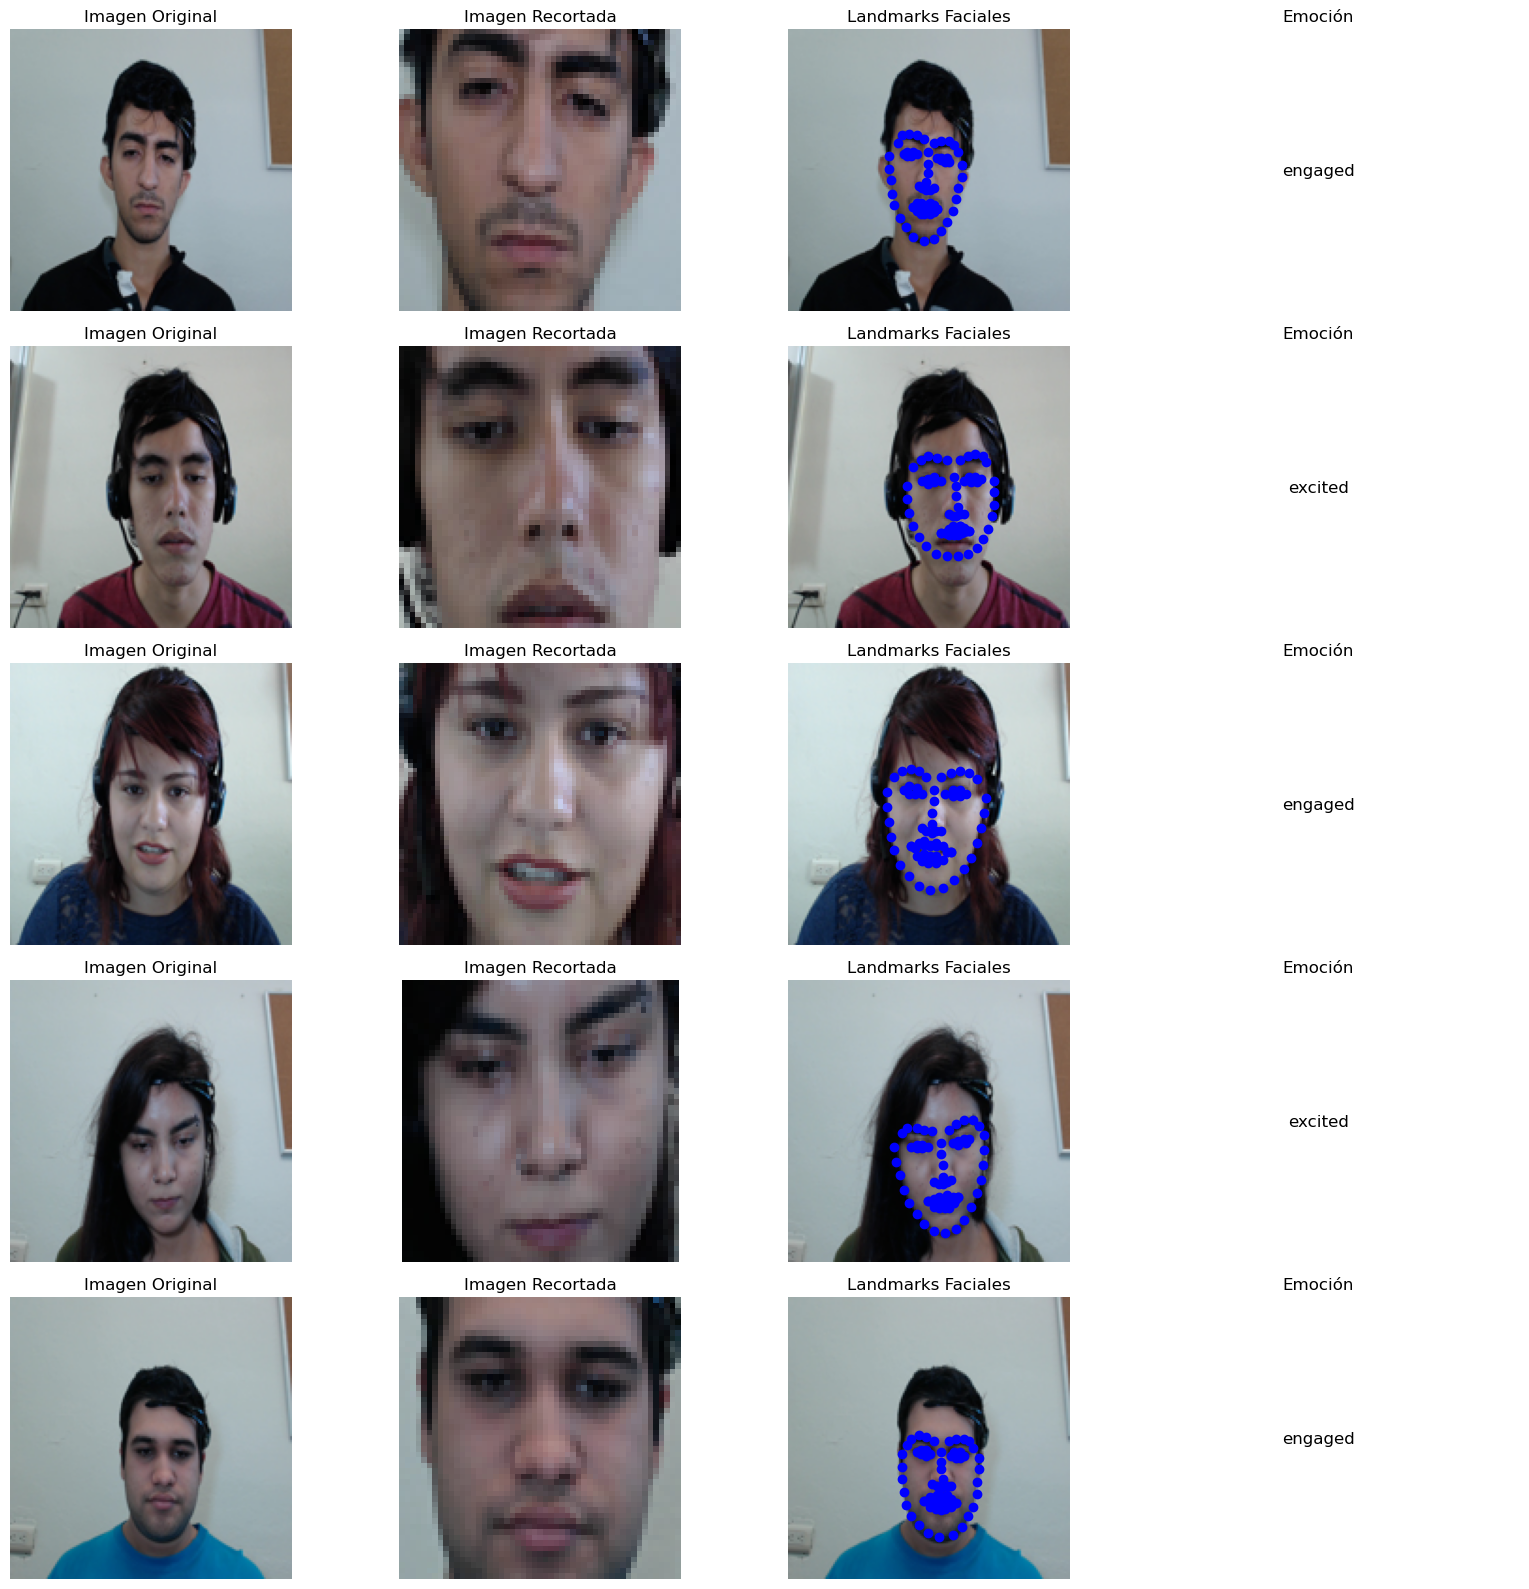

In [76]:
df_ejemploHDF = df_HDF.sample(n=5)

# Visualizar las imágenes seleccionadas con los rostros detectados y los landmarks faciales
fig, axes = plt.subplots(nrows=len(df_ejemploHDF), ncols=4, figsize=(16, 16))

for i, (index, row) in enumerate(df_ejemploHDF.iterrows()):
    # Subgráfico para la imagen original
    ax0 = axes[i, 0]
    ax0.imshow(row['Imagen'])
    ax0.set_title("Imagen Original")
    ax0.axis('off')
    
    # Subgráfico para la imagen recortada con el rostro detectado
    ax1 = axes[i, 1]
    imagen_recortada = row['Rostro']
    ax1.imshow(imagen_recortada)
    ax1.set_title("Imagen Recortada")
    ax1.axis('off')
    
    # Subgráfico para los landmarks faciales
    ax2 = axes[i, 2]
    ax2.imshow(row['Imagen'])

    for landmark in row['Caracteristicas']:
        for punto in landmark:
            ax2.plot(punto[0], punto[1], marker='o', markersize=6, color='blue')

    

    ax2.set_title("Landmarks Faciales")
    ax2.axis('off')
    
    # Subgráfico para la emoción (si está disponible)
    ax3 = axes[i, 3]
    # Aquí puedes agregar código para mostrar la emoción en lugar de un gráfico vacío
    ax3.text(0.5, 0.5, row['Etiqueta'], horizontalalignment='center', verticalalignment='center', fontsize=12)
    ax3.set_title("Emoción")
    ax3.axis('off')

plt.tight_layout()
plt.show()